In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.integrate as integ
import os
from multiprocessing import Pool
import pandas as pd
import csv
import time

In [2]:
a=8
L=a*a
xL,yL=(a,a)
steps=1000*L
config=np.ones(L)
N=10000#ensemblesize
J=[]
TT=100
T=np.linspace(1e-8,10,TT)
B=1/T


In [3]:
def Energy(_config):
    t_i=np.reshape(_config,(xL,yL))
    t_ip1=np.roll(t_i,-1,axis=1)
    t_im1=np.roll(t_i,1,axis=1)
    t_jp1=np.roll(t_i,-1,axis=0)
    t_jm1=np.roll(t_i,1,axis=0)
    
    E_sites=-t_i*(J[0]*t_ip1+J[1]*t_im1+J[2]*t_jp1+J[3]*t_jm1)
    E=np.sum(E_sites)
    return np.abs(E)

In [4]:
def S_z(_config):
    return np.abs(np.sum(_config))

In [5]:
def metropolis(B, _config):
    t=np.reshape(_config,(xL,yL))
    ind=np.random.randint(0,L)
    x=ind%xL
    y=ind//xL
    si=_config[ind]
    sf=_config[ind]*-1
    dE=2*si*(J[0]*t[(x+1)%xL,y]+J[1]*t[(x-1),y]+J[2]*t[x,(y+1)%yL]+J[3]*t[x,y-1])
    if(dE<0):
        _config[ind]=sf
    elif(np.random.uniform(0,1)<np.exp(-B*dE)):
        _config[ind]=sf
    else:
        _config[ind]=si
    return _config

In [6]:
def calculation(_config):
    m=S_z(_config)
    e=Energy(_config)
    return [m,m**2,e,e**2]

In [7]:
a=[[4,6,5],[1,3,2],[0,0,1]]
np.roll(a,-1,0)

array([[1, 3, 2],
       [0, 0, 1],
       [4, 6, 5]])

In [8]:
def B_depend(B):
    configs=np.zeros((steps,L))
    t=config
    m=np.zeros(steps)
    for i in range(steps):
        t = metropolis(B, t)
        configs[i,:]=t
    arr= np.zeros((N,4))
    c=0
    for i in configs[-N:,:]:
        arr[c,:]=calculation(i)
        c+=1
    return np.mean(arr,axis=0)

In [9]:
def work():
    #with Pool(os.cpu_count()) as pool:
    with Pool(8) as pool:
        results = pool.map(B_depend, B)
    pool.close()
    pool.join()
    return np.array(results)

In [10]:
def realization(size,lamb):
    f='data/lamb%s'%str(lamb)
    filename = f+'size%s.csv'%str(size)
    
    global config
    global a, L,xL,yL
    
    a=size
    L=a*a
    xL,yL=(a,a)
    config=np.ones(L)
    steps=1000*L
    #plt.figure(figsize=(15,15))
    # f1=open('lamb%s/Magnetization.txt'%str(lamb),'a')
    # f2=open('lamb%s/Energy.txt'%str(lamb),'a')
    # f3=open('lamb%s/SpecificHeat.txt'%str(lamb),'a')
    # f4=open('lamb%s/Suseptibility.txt'%str(lamb),'a')
    
    global J
    
    J=[1-lamb,1+lamb,1-lamb,1+lamb]
    t=work()
    m=t[:,0]/L
    e=t[:,2]/L
    c=(t[:,3]-t[:,2]**2)/T**2
    x=(t[:,1]-t[:,0]**2)/T

    # print(m)
    # print(e)
    # print(c)
    # print(x)
    with open(filename, 'a', newline="") as file:
        csvwriter = csv.writer(file)
        data=np.transpose([m,e,c,x])
        csvwriter.writerows(data)
    #os.system('spd-say "Input needed"')
    #a= input()
    #if(int(a)==1):
    
    # f1.write(str(m)+'exit\n')
    # f2.write(str(e)+'exit\n')
    # f3.write(str(c)+'exit\n')
    # f4.write(str(x)+'exit\n')
    # #else:
    # #    realization(lamb)
    # f1.close()
    # f2.close()
    # f3.close()
    # f4.close()
    

In [11]:
# R=8
# print('size'+str(R))
# f='size%s.csv'%str(R)
# from tqdm import tqdm
# for i in range(-10,11):
#     filename ='data/lamb%s'%str(i/10)+f
#     if not os.path.exists(filename):
#         header = ['Magnetization', 'Energy', 'SpecificHeat', 'Suceptibility']
#         with open(filename, 'w', newline="") as file:
#             csvwriter = csv.writer(file) # 2. create a csvwriter object
#             csvwriter.writerow(header)
#     for j in tqdm(range(1)):
#         realization(R,i/10)

In [16]:
def real_size(R):
    print('size'+str(R))
    f='size%s.csv'%str(R)
    from tqdm import tqdm
    for i in range(-10,11):
        filename ='data/lamb%s'%str(i/10)+f
        if not os.path.exists(filename):
            header = ['Magnetization', 'Energy', 'SpecificHeat', 'Suceptibility']
            with open(filename, 'w', newline="") as file:
                csvwriter = csv.writer(file) # 2. create a csvwriter object
                csvwriter.writerow(header)
        for j in tqdm(range(1)):
            realization(R,i/10)


In [17]:
real_size(8)

size8


100%|█████████████████████████████████████████████| 1/1 [00:22<00:00, 22.57s/it]


In [41]:
def realization2(size,lamb):
    f='diffSize/lamb%s'%str(lamb)
    filename = f+'size%s.csv'%str(size)
    
    global config
    global a, L,xL,yL
    
    a=size
    L=a*a
    xL,yL=(a,a)
    config=np.ones(L)
    steps=1000*L
    #plt.figure(figsize=(15,15))
    # f1=open('lamb%s/Magnetization.txt'%str(lamb),'a')
    # f2=open('lamb%s/Energy.txt'%str(lamb),'a')
    # f3=open('lamb%s/SpecificHeat.txt'%str(lamb),'a')
    # f4=open('lamb%s/Suseptibility.txt'%str(lamb),'a')
    
    global J
    
    J=[1-lamb,1+lamb,1-lamb,1+lamb]
    t=work()
    m=t[:,0]/L
    e=t[:,2]/L
    c=(t[:,3]-t[:,2]**2)/T**2
    x=(t[:,1]-t[:,0]**2)/T

    # print(m)
    # print(e)
    # print(c)
    # print(x)
    with open(filename, 'a', newline="") as file:
        csvwriter = csv.writer(file)
        data=np.transpose([m,e,c,x])
        csvwriter.writerows(data)
    #os.system('spd-say "Input needed"')
    #a= input()
    #if(int(a)==1):
    
    # f1.write(str(m)+'exit\n')
    # f2.write(str(e)+'exit\n')
    # f3.write(str(c)+'exit\n')
    # f4.write(str(x)+'exit\n')
    # #else:
    # #    realization(lamb)
    # f1.close()
    # f2.close()
    # f3.close()
    # f4.close()
    

In [42]:
def real_lambda(lamb):
    for i in size:
        print('size'+str(i))
        f='size%s.csv'%str(i)
        from tqdm import tqdm
        filename ='diffSize/lamb%s'%str(lamb)+f
        if not os.path.exists(filename):
            header = ['Magnetization', 'Energy', 'SpecificHeat', 'Suceptibility']
            with open(filename, 'w', newline="") as file:
                csvwriter = csv.writer(file) # 2. create a csvwriter object
                csvwriter.writerow(header)
        for j in tqdm(range(50)):
            realization2(i,lamb)
        time.sleep(600)

In [43]:
size=np.array(range(4,21,2))
real_lambda(0.0)

size4


100%|███████████████████████████████████████████| 50/50 [17:21<00:00, 20.83s/it]


size6


100%|███████████████████████████████████████████| 50/50 [17:21<00:00, 20.84s/it]


size8


100%|███████████████████████████████████████████| 50/50 [15:42<00:00, 18.84s/it]


size10


100%|███████████████████████████████████████████| 50/50 [15:40<00:00, 18.82s/it]


size12


100%|███████████████████████████████████████████| 50/50 [16:04<00:00, 19.28s/it]


size14


100%|███████████████████████████████████████████| 50/50 [16:14<00:00, 19.50s/it]


size16


100%|███████████████████████████████████████████| 50/50 [16:30<00:00, 19.81s/it]


size18


100%|███████████████████████████████████████████| 50/50 [17:06<00:00, 20.53s/it]


size20


100%|███████████████████████████████████████████| 50/50 [17:33<00:00, 21.06s/it]


In [16]:
 
duration = 10  # seconds
freq = 600  # Hz
    
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))
    
os.system('spd-say "Your Program has ended, moron"')

0

In [17]:
def plotyplot(lamb,R):
    f='size%s.csv'%str(R)
    data= pd.read_csv("data/lamb%s"%str(lamb)+f)
    m=np.array(data.Magnetization)
    e=np.array(data.Energy)
    c=np.array(data.SpecificHeat)
    x=np.array(data.Suceptibility)
    M=np.zeros(TT)
    E=np.zeros(TT)
    C=np.zeros(TT)
    X=np.zeros(TT)
    R_no=m.size//TT
    for i in range(R_no):
        M+=m[i*TT:(i+1)*TT]
        E+=e[i*TT:(i+1)*TT]
        C+=c[i*TT:(i+1)*TT]
        X+=x[i*TT:(i+1)*TT]
    M=M/R_no
    E=E/R_no
    C=C/R_no
    X=X/R_no
    
    plt.subplot(2, 2, 1)
    #plt.scatter(T,M,label=str(lamb),s=16)
    plt.plot(T,M,label=str(lamb))
    #plt.xlim([0,5])
    plt.subplot(2, 2, 2)
    #plt.scatter(T,E,label=str(lamb),s=16)
    plt.plot(T,E,label=str(lamb))
    plt.subplot(2, 2, 3)
    #plt.scatter(T,C,label=str(lamb),s=16)#,marker=".")
    plt.plot(T,C,label=str(lamb))
    plt.subplot(2, 2, 4)
    #plt.scatter(T,X,label=str(lamb),s=16)#marker=".")
    plt.plot(T,X,label=str(lamb))
    print(R_no)


6


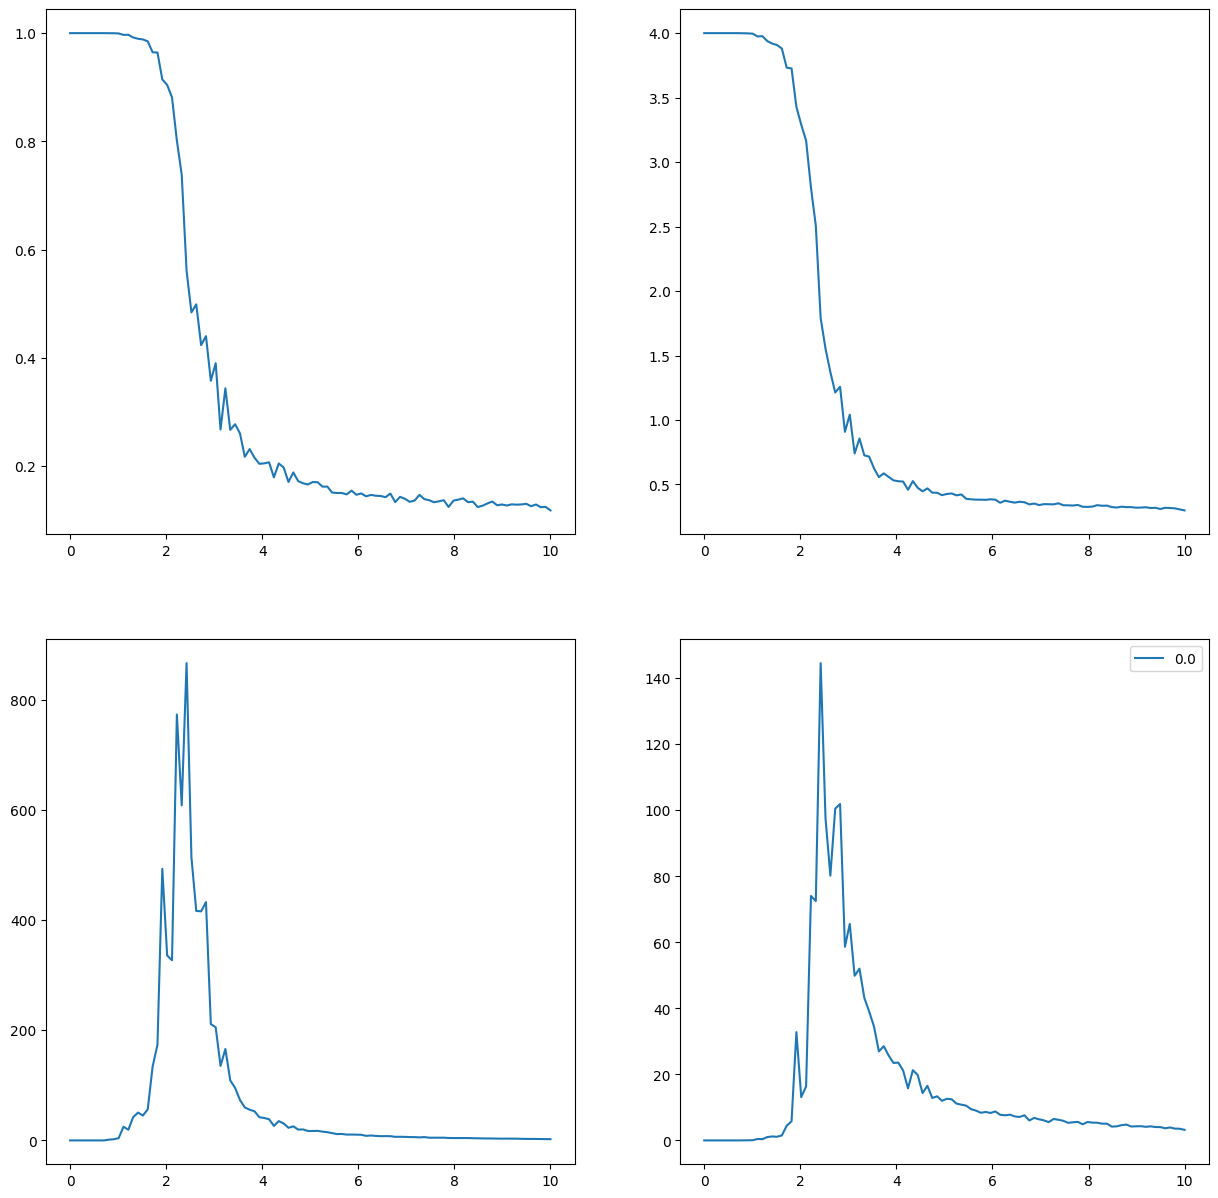

In [18]:
plt.figure(figsize=(15,15))
size=8
plotyplot(0.0,size)
# plotyplot(0.2,size)
# plotyplot(0.4,size)
# plotyplot(0.6,size)
# plotyplot(0.8,size)
# plotyplot(1.0,size)

plt.legend()
plt.show()
